In [1]:
from plotnine import (
    ggplot,
    aes,
    geom_line,
    facet_wrap,
    labs,
    scale_x_datetime,
    element_text,
    theme_538
)
from plotnine.data import meat

### Line plots

`geom_line()` connects the dots, and is useful for time series data.

In [2]:
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


Make it tidy.

In [3]:
meat_long = meat.melt(
    id_vars="date",
    value_vars=["beef", "veal", "pork", "lamb_and_mutton", "broilers", "turkey"],
    var_name="animal",
    value_name="weight"
).dropna()

meat_long.head()

,date,animal,weight
0,1944-01-01,beef,751.0
1,1944-02-01,beef,713.0
2,1944-03-01,beef,741.0
3,1944-04-01,beef,650.0
4,1944-05-01,beef,681.0


First try

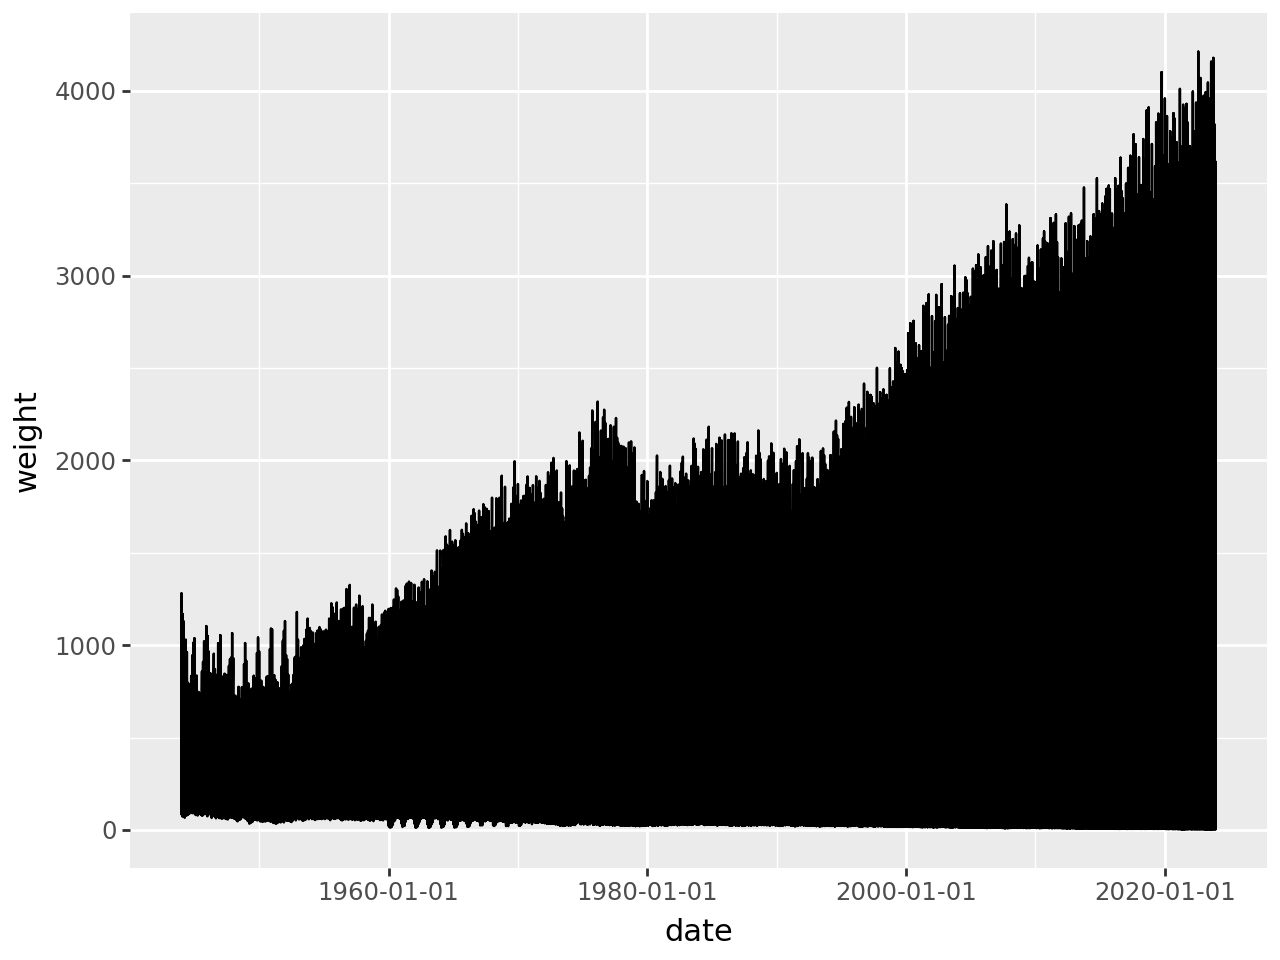

In [4]:
p = (
    ggplot(meat_long, aes(x="date", y="weight"))
    + geom_line()
)
p

It looks crowded because each there is more than one monthly entry at each x-point.
We can get a single trend line by getting a monthly aggregate of the weights.

In [5]:
meat_long_monthly_agg = meat_long.groupby("date").agg({"weight": "sum"}).reset_index()
meat_long_monthly_agg

,date,weight
0,1944-01-01,2205.0
1,1944-02-01,2031.0
2,1944-03-01,2034.0
3,1944-04-01,1783.0
4,1944-05-01,1894.0
...,...,...
955,2023-08-01,9319.1
956,2023-09-01,8586.1
957,2023-10-01,9452.5
958,2023-11-01,8951.1


### A Single Trend Line

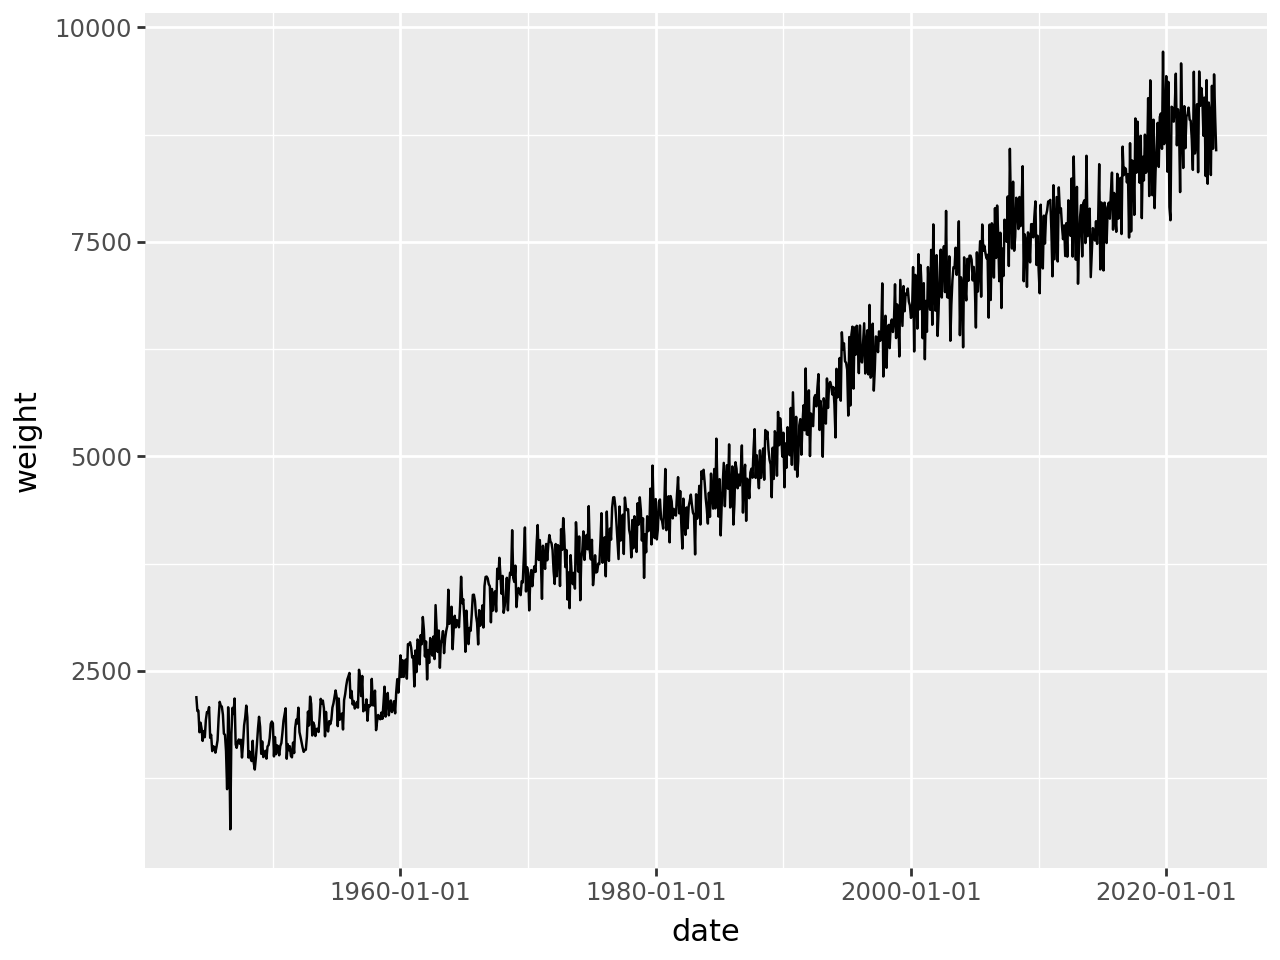

In [6]:
(
    ggplot(meat_long_monthly_agg, aes(x="date", y="weight"))
    + geom_line()
)

Add some style

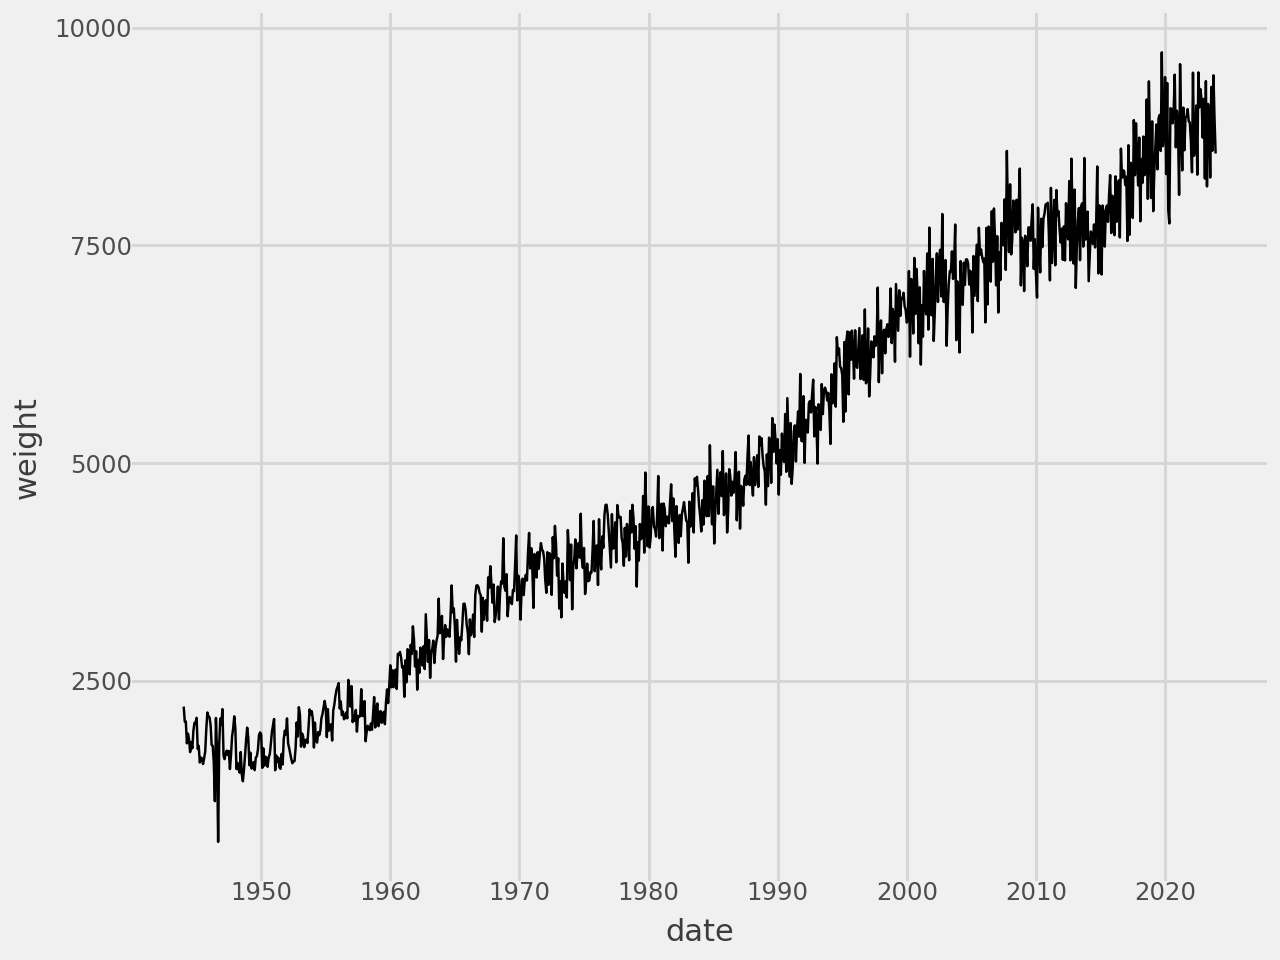

In [7]:
# Gallery, lines
(
    ggplot(meat_long_monthly_agg, aes(x="date", y="weight"))
    + geom_line()
    # Styling
    + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
    + theme_538()
)

Or we can group by the animals to get a trend line for each animal

### Multiple Trend Lines

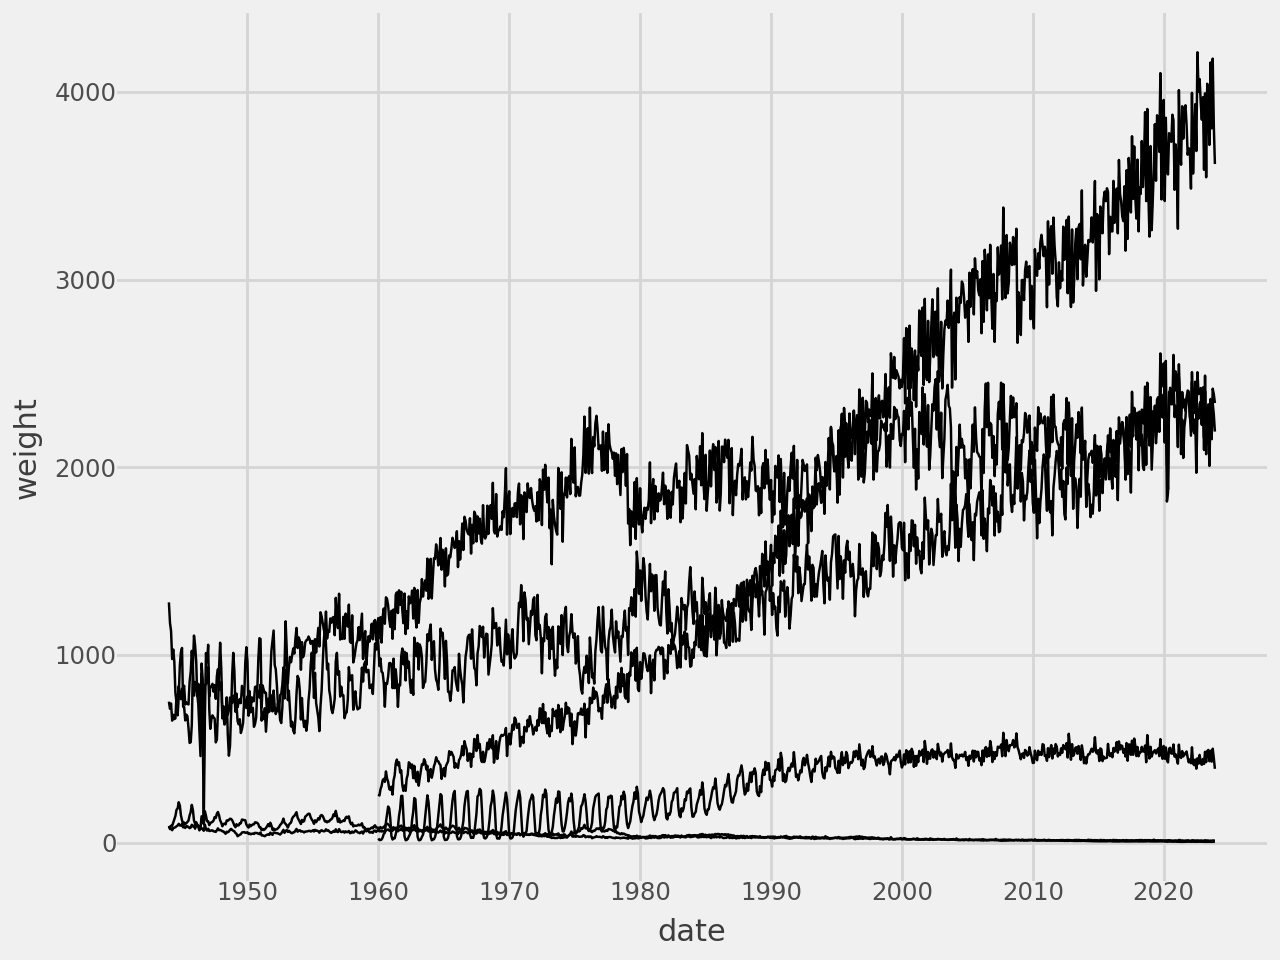

In [8]:
(
    ggplot(meat_long, aes(x="date", y="weight", group="animal"))
    + geom_line()
    # Styling
    + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
    + theme_538()
)

Make each group be a different color.

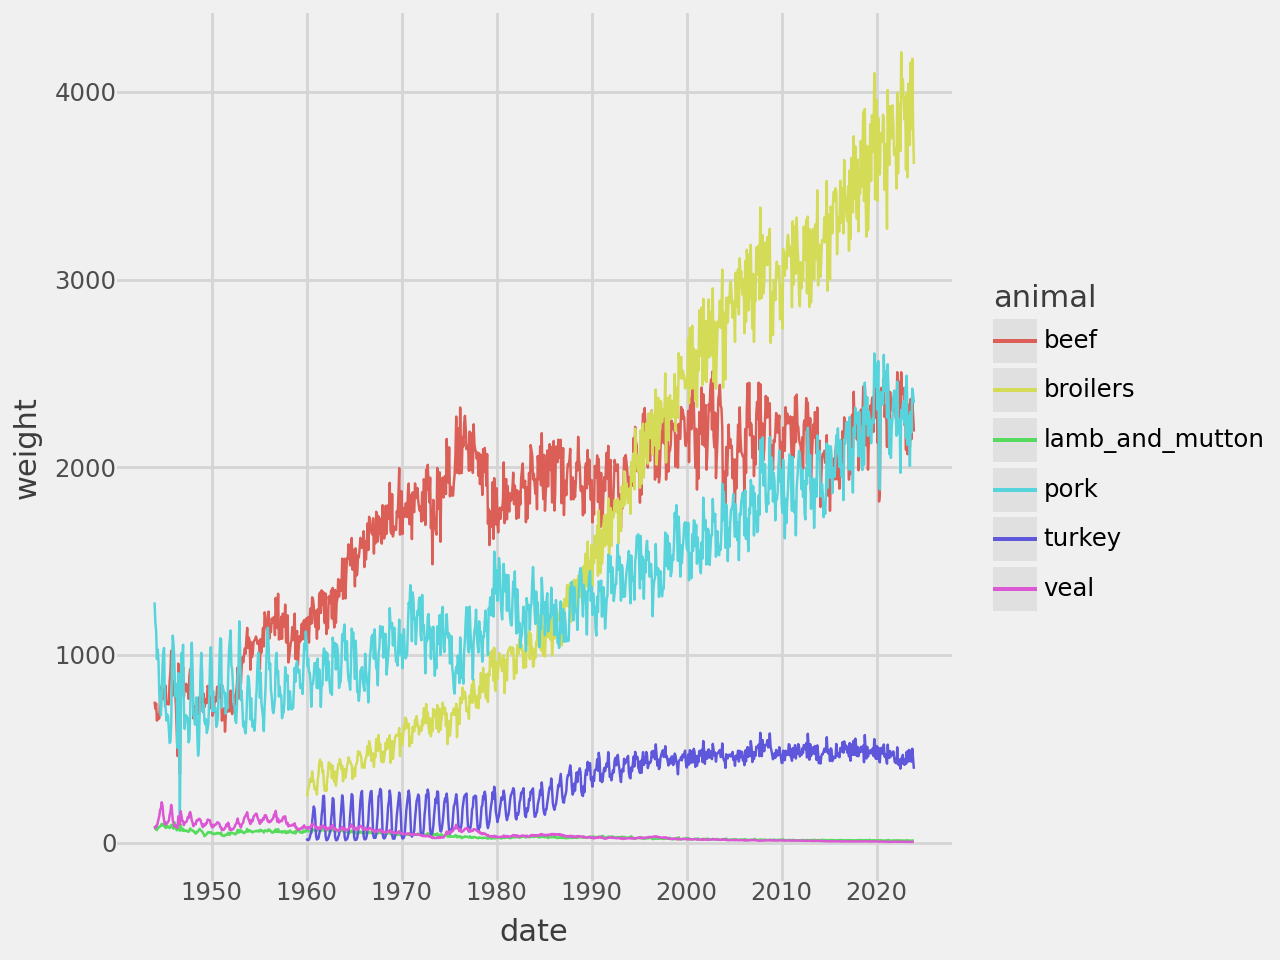

In [9]:
# Gallery, lines
(
    ggplot(meat_long, aes(x="date", y="weight", color="animal"))
    + geom_line()
    # Styling
    + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
    + theme_538()
)

### A Trend Line Per Facet

Plot each group on a separate panel. The legend is no longer required and we adjust to the smaller panels by reducing the `size` of the line, `size` of the text and the number of grid lines.

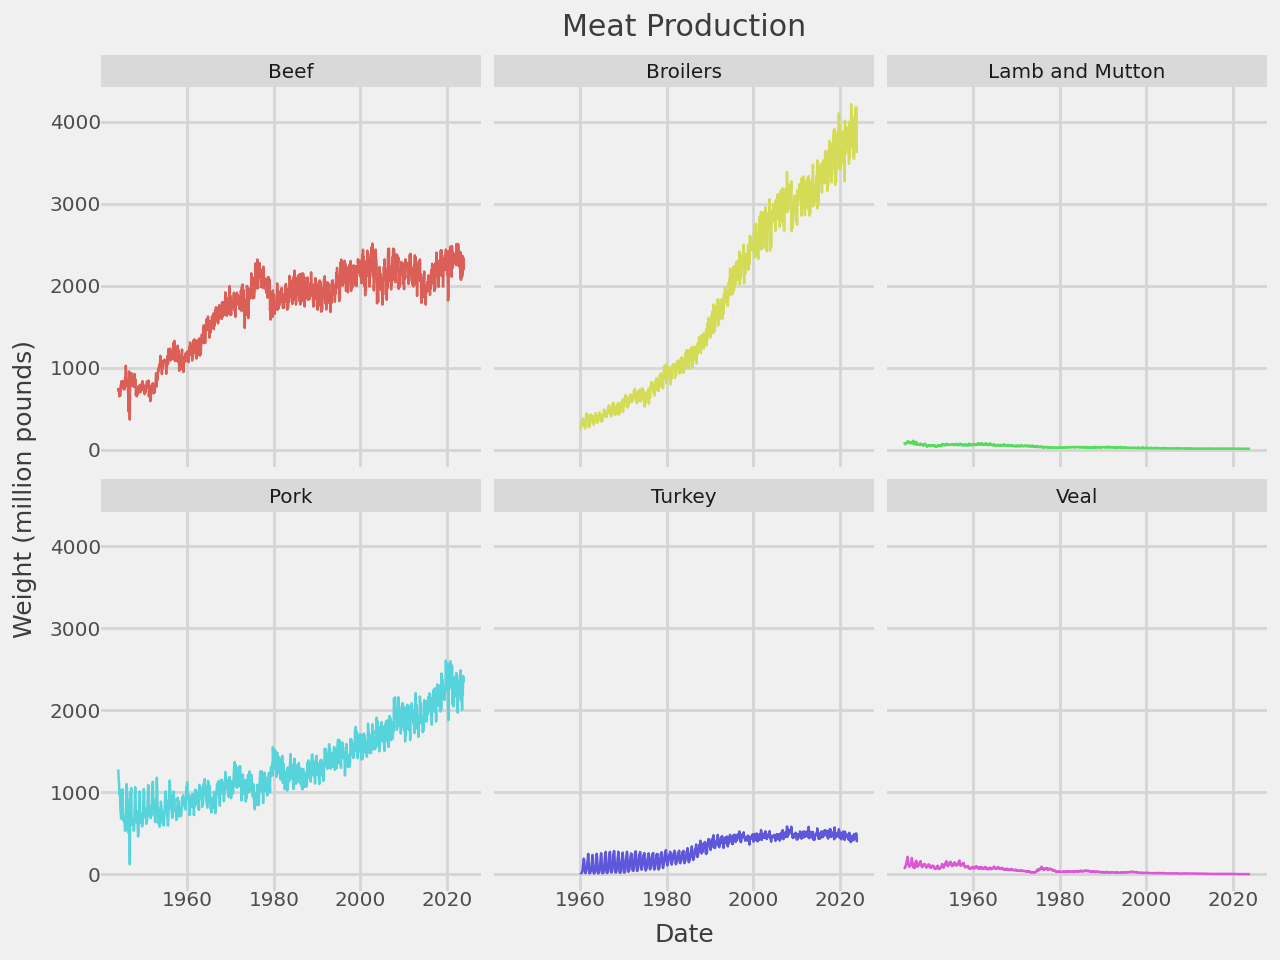

In [10]:
# Gallery, lines
def titled(strip_title):
    return " ".join(s.title() if s != "and" else s for s in strip_title.split("_"))

(
    ggplot(meat_long, aes("date", "weight", color="animal"))
    + geom_line(size=.5, show_legend=False)
    + facet_wrap("animal", labeller=titled)
    + scale_x_datetime(date_breaks="20 years", date_labels="%Y")
    + labs(
        x="Date",
        y="Weight (million pounds)",
        title="Meat Production"
    )
    + theme_538(base_size=9)
)